In [1]:
import os
import pandas as pd

def process_folder_data(folder_path, start_date='2010-01-01', threshold=0.01):
    """
    Обрабатывает все CSV-файлы в указанной папке, объединяет данные,
    фильтрует по дате и удаляет столбцы с пропусками.

    Параметры:
    - folder_path: путь к папке с CSV-файлами
    - start_date: начальная дата для фильтрации (по умолчанию '2010-01-01')
    - threshold: максимально допустимая доля пропусков (по умолчанию 0.01)

    Возвращает:
    - Объединенный и очищенный DataFrame
    """
    
    data_frames = []

    # Обработка каждого CSV-файла
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            
            # Загрузка и преобразование данных
            df = pd.read_csv(file_path)
            df['datetime'] = pd.to_datetime(df['datetime'])
            df['tic'] = file_name.replace('.csv', '')
            
            # Преобразование в широкий формат
            df_pivot = df.pivot(index='datetime', columns='tic', values='close')
            data_frames.append(df_pivot)

    # Объединение данных
    merged_data = pd.concat(data_frames, axis=1)
    
    # Фильтрация по дате
    merged_data = merged_data.loc[start_date:]
    
    # Удаление столбцов с пропусками
    null_percent = merged_data.isna().mean()
    columns_to_drop = null_percent[null_percent >= threshold].index
    merged_data = merged_data.drop(columns=columns_to_drop)

    return merged_data

# Вызов функции
result = process_folder_data(
    folder_path="D1_data",
    start_date='2010-01-01',
    threshold=0.01
)

# Просмотр первых 5 строк
print(result.head())

tic         ABIO_D1  AFKS_D1  AFLT_D1  AKRN_D1  AMEZ_D1  APTK_D1  BLNG_D1  \
datetime                                                                    
2010-01-11    17.72   25.599    54.38    904.0     9.27   220.97    20.04   
2010-01-12    17.50   25.970    54.24    905.0     9.19   217.56    21.75   
2010-01-13    17.28   26.578    53.68    958.0     9.33   217.99    23.38   
2010-01-14    16.47   28.730    54.52    967.0    10.46   221.00    23.50   
2010-01-15    15.67   28.480    54.60    976.0    11.11   219.58    23.00   

tic         BSPB_D1  CHMF_D1  CHMK_D1  ...  SNGS_D1  SVAV_D1  TATNP_D1  \
datetime                               ...                               
2010-01-11    87.39    302.4   5170.0  ...   28.277    436.5      79.4   
2010-01-12    84.44    303.0   5460.0  ...   27.541    434.5      80.3   
2010-01-13    87.03    320.0   6045.0  ...   27.745    432.5      80.9   
2010-01-14    95.00    351.5   6250.0  ...   27.668    438.0      79.9   
2010-01-15    95

In [2]:
result=result.interpolate()

In [3]:
result

tic,ABIO_D1,AFKS_D1,AFLT_D1,AKRN_D1,AMEZ_D1,APTK_D1,BLNG_D1,BSPB_D1,CHMF_D1,CHMK_D1,...,SNGS_D1,SVAV_D1,TATNP_D1,TATN_D1,TGKA_D1,TGKB_D1,TRMK_D1,TRNFP_D1,VSMO_D1,VTBR_D1
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-11,17.72,25.599,54.38,904.0,9.27,220.970,20.04,87.39,302.4,5170.0,...,28.277,436.5,79.4,144.2,0.017100,0.006900,136.85,245.0,2285.0,363.00
2010-01-12,17.50,25.970,54.24,905.0,9.19,217.560,21.75,84.44,303.0,5460.0,...,27.541,434.5,80.3,142.8,0.017100,0.006800,139.02,244.6,2246.0,363.50
2010-01-13,17.28,26.578,53.68,958.0,9.33,217.990,23.38,87.03,320.0,6045.0,...,27.745,432.5,80.9,144.5,0.017100,0.006900,141.64,241.4,2270.0,372.00
2010-01-14,16.47,28.730,54.52,967.0,10.46,221.000,23.50,95.00,351.5,6250.0,...,27.668,438.0,79.9,144.1,0.017600,0.006900,148.62,253.0,2667.0,371.50
2010-01-15,15.67,28.480,54.60,976.0,11.11,219.580,23.00,95.89,349.0,7500.0,...,27.484,442.0,80.0,145.2,0.017700,0.007500,150.52,254.3,2600.0,373.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21,81.38,19.000,48.04,15008.0,168.86,11.240,21.18,370.86,1321.0,6885.0,...,25.745,776.5,601.4,603.5,0.007552,0.010805,131.86,1336.0,28260.0,100.19
2024-08-22,79.80,17.935,46.65,15006.0,168.10,10.950,20.15,366.07,1292.8,6720.0,...,24.715,738.0,596.8,601.7,0.007240,0.010170,124.52,1317.0,28000.0,96.64
2024-08-23,77.12,18.151,46.45,15068.0,157.38,10.396,19.39,360.42,1253.2,6505.0,...,24.275,733.0,592.9,596.6,0.006966,0.009535,120.48,1303.5,27080.0,96.47


In [4]:
result.isna().sum().sort_values(ascending=False)

tic
ABIO_D1    0
ROSN_D1    0
MSRS_D1    0
MTLR_D1    0
MTSS_D1    0
          ..
MRKC_D1    0
MRKK_D1    0
MRKP_D1    0
MRKU_D1    0
VTBR_D1    0
Length: 63, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import talib


# Функция для выбора тикера и обработки данных
def analyze_ticker(df, ticker_column):
    ticker_data = df[ticker_column].dropna()
    if len(ticker_data) < 30:  # Проверка на достаточное количество данных
        return None
    ticker_df = pd.DataFrame({'close': ticker_data})
    # Рассчитываем базовые индикаторы
    # 1. Скользящие средние
    ticker_df['SMA_5'] = ticker_df['close'].rolling(window=5).mean()
    ticker_df['SMA_20'] = ticker_df['close'].rolling(window=20).mean()
    ticker_df['EMA_12'] = ticker_df['close'].ewm(span=12, adjust=False).mean()
    ticker_df['EMA_26'] = ticker_df['close'].ewm(span=26, adjust=False).mean()
    
    # 2. MACD
    ticker_df['MACD'] = ticker_df['EMA_12'] - ticker_df['EMA_26']
    ticker_df['MACD_signal'] = ticker_df['MACD'].ewm(span=9, adjust=False).mean()
    ticker_df['MACD_hist'] = ticker_df['MACD'] - ticker_df['MACD_signal']
    
    # 3. Relative Strength Index (RSI)
    delta = ticker_df['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    ticker_df['RSI'] = 100 - (100 / (1 + rs))
    # 4. Bollinger Bands
    ticker_df['BB_middle'] = ticker_df['close'].rolling(window=20).mean()
    ticker_df['BB_std'] = ticker_df['close'].rolling(window=20).std()
    ticker_df['BB_upper'] = ticker_df['BB_middle'] + (ticker_df['BB_std'] * 2)
    ticker_df['BB_lower'] = ticker_df['BB_middle'] - (ticker_df['BB_std'] * 2)
    
    # 5. Расчет доходности
    ticker_df['daily_return'] = ticker_df['close'].pct_change() * 100
    ticker_df['cumulative_return'] = (1 + ticker_df['daily_return'] / 100).cumprod() - 1
    
    # 6. Волатильность (стандартное отклонение доходности)
    ticker_df['volatility_20d'] = ticker_df['daily_return'].rolling(window=20).std()
    
    # 7. Momentum
    ticker_df['momentum_14d'] = ticker_df['close'] - ticker_df['close'].shift(14)
    
    # 8. Rate of Change (ROC)
    ticker_df['ROC_14d'] = (ticker_df['close'] / ticker_df['close'].shift(14) - 1) * 100
    
    # 9. Средний истинный диапазон (ATR)
    # Для ATR нужны high, low и close, но у нас только close
    # Создаем приближенный расчет используя волатильность
    ticker_df['ATR_14d'] = ticker_df['close'] * ticker_df['volatility_20d'] / 100
    ticker_df['highest_14d'] = ticker_df['close'].rolling(window=14).max()
    ticker_df['lowest_14d'] = ticker_df['close'].rolling(window=14).min()
    ticker_df['%K'] = 100 * ((ticker_df['close'] - ticker_df['lowest_14d']) / 
                            (ticker_df['highest_14d'] - ticker_df['lowest_14d']))
    ticker_df['%D'] = ticker_df['%K'].rolling(window=3).mean()
    return ticker_df

# Анализ первых 5 тикеров для примера
ticker_results = {}
for ticker in result.columns[:15]:  # Берем первые 5 тикеров для примера
    ticker_results[ticker] = analyze_ticker(result, ticker)

In [9]:
ticker_results['ABIO_D1']

,close,SMA_5,SMA_20,EMA_12,EMA_26,MACD,MACD_signal,MACD_hist,RSI,BB_middle,...,daily_return,cumulative_return,volatility_20d,momentum_14d,ROC_14d,ATR_14d,highest_14d,lowest_14d,%K,%D
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-11,17.72,NaN,NaN,17.720000,17.720000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,17.50,NaN,NaN,17.686154,17.703704,-0.017550,-0.003510,-0.014040,NaN,NaN,...,-1.241535,-0.012415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,17.28,NaN,NaN,17.623669,17.672318,-0.048650,-0.012538,-0.036112,NaN,NaN,...,-1.257143,-0.024831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,16.47,NaN,NaN,17.446181,17.583258,-0.137076,-0.037446,-0.099631,NaN,NaN,...,-4.687500,-0.070542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-15,15.67,16.928,NaN,17.172923,17.441535,-0.268612,-0.083679,-0.184933,NaN,NaN,...,-4.857316,-0.115688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21,81.38,82.288,84.232,83.311967,84.825234,-1.513268,-1.442034,-0.071234,39.607843,84.232,...,-0.147239,3.592551,1.978005,-4.24,-4.952114,1.609700,86.94,81.38,0.000000,0.664011
2024-08-22,79.80,81.704,83.801,82.771664,84.452995,-1.681331,-1.489893,-0.191437,39.453125,83.801,...,-1.941509,3.503386,2.004268,-4.32,-5.135521,1.599406,86.94,79.80,0.000000,0.000000
2024-08-23,77.12,80.364,83.330,81.902177,83.909810,-2.007633,-1.593441,-0.414191,38.512869,83.330,...,-3.358396,3.352144,2.074823,-4.82,-5.882353,1.600103,86.94,77.12,0.000000,0.000000


In [22]:
# Матрица корреляций для закрытия цен
def create_correlation_matrix(df):
    # Выбираем только числовые столбцы
    numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    if len(numeric_cols) < 2:
        return None
    
    # Создаем матрицу корреляций
    corr_matrix = df[numeric_cols].corr(method='spearman')
    return corr_matrix

# Создаем матрицу корреляций на основе цен закрытия
close_prices = pd.DataFrame()
for ticker in result.columns:
    if pd.api.types.is_numeric_dtype(result[ticker]):
        close_prices[ticker] = result[ticker]

corr_matrix = create_correlation_matrix(close_prices)

In [40]:
def plot_correlation_matrix(corr_matrix):
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', fmt=".2f",robust=True, 
                linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Матрица корреляций между активами')
    plt.tight_layout()
    return plt

In [ ]:
# Функция для кластеризации активов на основе корреляций
def cluster_assets(corr_matrix):
    from scipy.cluster.hierarchy import linkage, dendrogram
    
    # Преобразуем корреляцию в меру расстояния
    dist_matrix = 1 - corr_matrix
    
    # Выполняем иерархическую кластеризацию
    linkage_matrix = linkage(dist_matrix, method='ward')
    
    # Визуализируем дендрограмму
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=dist_matrix.index)
    plt.title('Кластеризация активов на основе корреляции')
    plt.xlabel('Активы')
    plt.ylabel('Расстояние')
    plt.tight_layout()
    return plt

C:\Users\bodya\AppData\Local\Temp\ipykernel_24076\289282345.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')


<module 'matplotlib.pyplot' from 'c:\\Users\\bodya\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

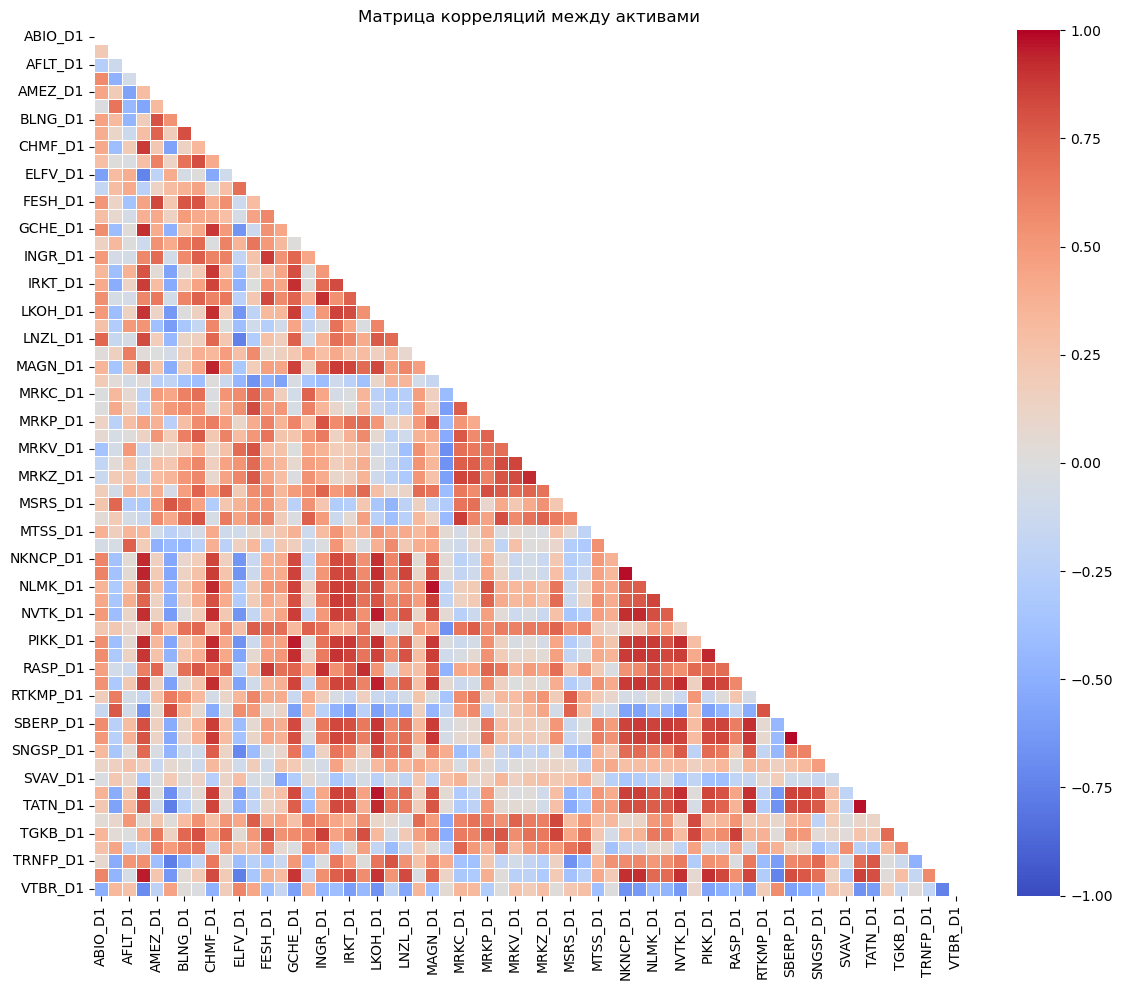

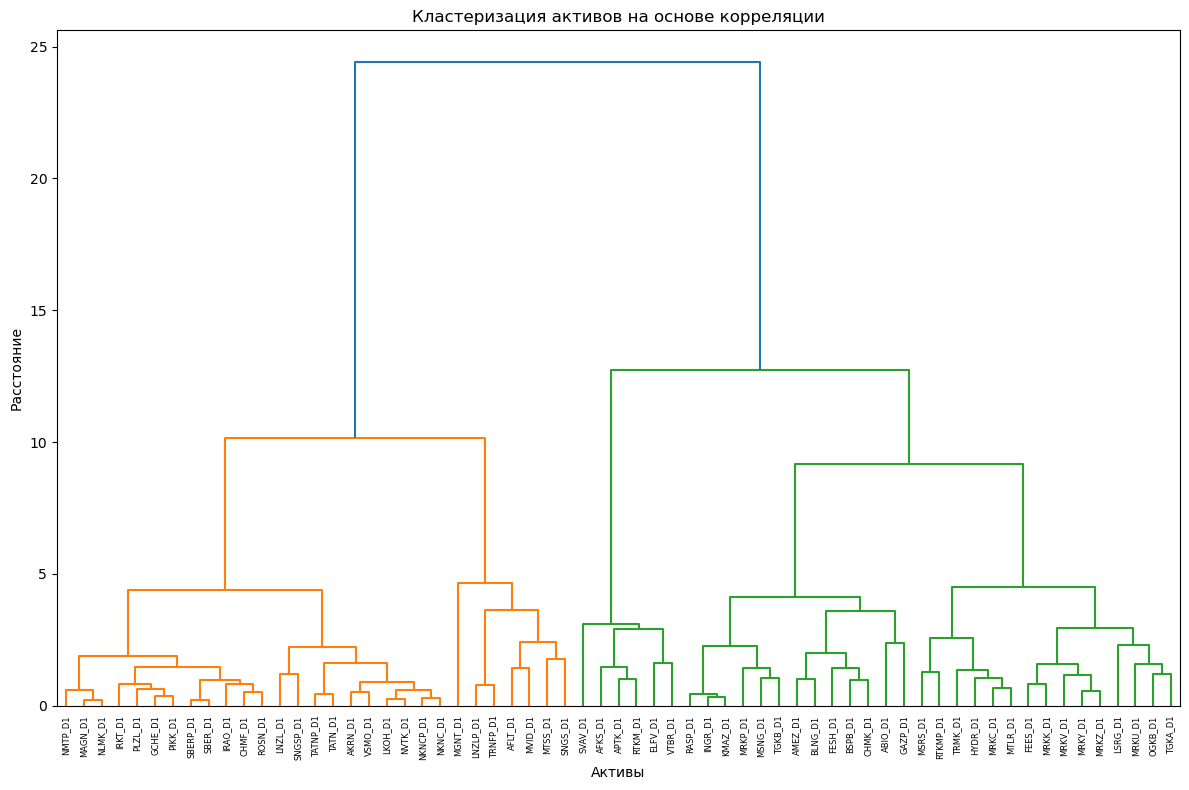

In [41]:
plot_correlation_matrix(corr_matrix)
cluster_assets(corr_matrix)

In [35]:

# Функция для расчета и визуализации основных статистик
def calculate_statistics(ticker_df, ticker_name):
    stats = {}
    
    # Основные статистики
    stats['mean'] = ticker_df['close'].mean()
    stats['median'] = ticker_df['close'].median()
    stats['std'] = ticker_df['close'].std()
    stats['min'] = ticker_df['close'].min()
    stats['max'] = ticker_df['close'].max()
    stats['range'] = stats['max'] - stats['min']
    stats['skewness'] = ticker_df['close'].skew()
    stats['kurtosis'] = ticker_df['close'].kurtosis()
    
    # Доходность
    stats['mean_return'] = ticker_df['daily_return'].mean()
    stats['volatility'] = ticker_df['daily_return'].std()
    stats['sharpe_ratio'] = stats['mean_return'] / stats['volatility'] if stats['volatility'] != 0 else 0
    
    # Максимальная просадка
    cumulative_returns = (1 + ticker_df['daily_return'] / 100).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / running_max - 1) * 100
    stats['max_drawdown'] = drawdown.min()
    
    return stats

# Рассчитаем статистики для каждого тикера
ticker_stats = {}
for ticker, data in ticker_results.items():
    if data is not None:
        ticker_stats[ticker] = calculate_statistics(data, ticker)

In [36]:
ticker_stats['ABIO_D1']

{'mean': 31.396514573685643,
 'median': 13.93,
 'std': 33.73338896141783,
 'min': 7.76,
 'max': 148.92,
 'range': 141.16,
 'skewness': 1.568399945456387,
 'kurtosis': 0.950047058336593,
 'mean_return': 0.10447248919465735,
 'volatility': 3.6661480259197825,
 'sharpe_ratio': 0.02849652781503462,
 'max_drawdown': -70.69486404833829}

In [37]:
def calculate_advanced_indicators(ticker_df):
    # Рассчитаем предполагаемые high и low на основе волатильности
    ticker_df['high'] = ticker_df['close'] * (1 + ticker_df['volatility_20d'] / 200)
    ticker_df['low'] = ticker_df['close'] * (1 - ticker_df['volatility_20d'] / 200)
    ticker_df['open'] = ticker_df['close'].shift(1)
    
    # Рассчитаем индекс товарного канала (CCI)
    ticker_df['typical_price'] = (ticker_df['high'] + ticker_df['low'] + ticker_df['close']) / 3
    ticker_df['CCI'] = (ticker_df['typical_price'] - ticker_df['typical_price'].rolling(window=20).mean()) / \
                     (0.015 * ticker_df['typical_price'].rolling(window=20).std())
    
    # Рассчитаем индикатор Уильямса %R
    ticker_df['Williams_R'] = -100 * ((ticker_df['highest_14d'] - ticker_df['close']) / 
                                     (ticker_df['highest_14d'] - ticker_df['lowest_14d']))
    
    # Рассчитаем индикатор накопления/распределения (A/D)
    ticker_df['MFM'] = ((ticker_df['close'] - ticker_df['low']) - (ticker_df['high'] - ticker_df['close'])) / \
                      (ticker_df['high'] - ticker_df['low'])
    ticker_df['MFM'] = ticker_df['MFM'].replace([np.inf, -np.inf], 0)
    ticker_df['AD'] = ticker_df['MFM'].cumsum()
    
    # Расчет True Strength Index (TSI)
    momentum = ticker_df['close'].diff()
    momentum_abs = momentum.abs()
    
    long_ema = momentum.ewm(span=25, adjust=False).mean()
    long_ema_abs = momentum_abs.ewm(span=25, adjust=False).mean()
    
    short_ema = long_ema.ewm(span=13, adjust=False).mean()
    short_ema_abs = long_ema_abs.ewm(span=13, adjust=False).mean()
    
    ticker_df['TSI'] = 100 * (short_ema / short_ema_abs)
    
    # Расчет Parabolic SAR (простая аппроксимация)
    ticker_df['PSAR'] = ticker_df['close'].rolling(window=10).mean()
    
    # Расчет KDJ индикатора
    ticker_df['KDJ_K'] = ticker_df['%K']
    ticker_df['KDJ_D'] = ticker_df['%D']
    ticker_df['KDJ_J'] = 3 * ticker_df['KDJ_K'] - 2 * ticker_df['KDJ_D']
    
    return ticker_df

# Рассчитаем продвинутые индикаторы для каждого тикера
for ticker, data in ticker_results.items():
    if data is not None:
        ticker_results[ticker] = calculate_advanced_indicators(data)

In [38]:
def calculate_risk_metrics(returns_series, confidence_level=0.95):
    # Сортируем доходности
    sorted_returns = np.sort(returns_series.dropna())
    
    # Расчет VaR
    var_index = int(len(sorted_returns) * (1 - confidence_level))
    var = -sorted_returns[var_index]
    
    # Расчет ES (CVaR)
    es = -sorted_returns[:var_index].mean()
    
    return {
        'VaR': var,
        'ES': es
    }

# Расчет метрик риска для каждого тикера
risk_metrics = {}
for ticker, data in ticker_results.items():
    if data is not None:
        risk_metrics[ticker] = calculate_risk_metrics(data['daily_return'])

In [39]:
# Результаты анализа
analysis_summary = {
    'ticker_stats': ticker_stats,

    'risk_metrics': risk_metrics
}

# Вывод обобщенных результатов
def print_summary(analysis_summary):
    summary_text = "Обобщенные результаты анализа:\n\n"
    
    # Статистика по тикерам
    summary_text += "Статистика по тикерам:\n"
    for ticker, stats in analysis_summary['ticker_stats'].items():
        summary_text += f"\n{ticker}:\n"
        summary_text += f"  Средняя цена: {stats['mean']:.2f}\n"
        summary_text += f"  Волатильность: {stats['std']:.2f}\n"
        summary_text += f"  Средняя дневная доходность: {stats['mean_return']:.4f}%\n"
        summary_text += f"  Коэффициент Шарпа: {stats['sharpe_ratio']:.4f}\n"
        summary_text += f"  Максимальная просадка: {stats['max_drawdown']:.2f}%\n"
    

    # Метрики риска
    summary_text += "\nМеры риска (95% доверительный интервал):\n"
    for ticker, risk in analysis_summary['risk_metrics'].items():
        summary_text += f"\n{ticker}:\n"
        summary_text += f"  Value at Risk (VaR): {risk['VaR']:.4f}%\n"
        summary_text += f"  Expected Shortfall (ES): {risk['ES']:.4f}%\n"
    
    return summary_text

# Вызов функций для создания сводки
summary = print_summary(analysis_summary)
print(summary)

Обобщенные результаты анализа:

Статистика по тикерам:

ABIO_D1:
  Средняя цена: 31.40
  Волатильность: 33.73
  Средняя дневная доходность: 0.1045%
  Коэффициент Шарпа: 0.0285
  Максимальная просадка: -70.69%

AFKS_D1:
  Средняя цена: 21.40
  Волатильность: 8.58
  Средняя дневная доходность: 0.0343%
  Коэффициент Шарпа: 0.0109
  Максимальная просадка: -87.48%

AFLT_D1:
  Средняя цена: 73.42
  Волатильность: 40.23
  Средняя дневная доходность: 0.0211%
  Коэффициент Шарпа: 0.0096
  Максимальная просадка: -90.02%

AKRN_D1:
  Средняя цена: 5723.08
  Волатильность: 5889.60
  Средняя дневная доходность: 0.0954%
  Коэффициент Шарпа: 0.0489
  Максимальная просадка: -50.02%

AMEZ_D1:
  Средняя цена: 15.79
  Волатильность: 23.02
  Средняя дневная доходность: 0.1207%
  Коэффициент Шарпа: 0.0400
  Максимальная просадка: -83.51%

APTK_D1:
  Средняя цена: 26.02
  Волатильность: 31.67
  Средняя дневная доходность: -0.0473%
  Коэффициент Шарпа: -0.0173
  Максимальная просадка: -98.19%

BLNG_D1:
  Сред

In [ ]:










# Дополнительные продвинутые индикаторы




# Функция для визуализации индикаторов
def plot_indicators(ticker_df, ticker_name):
    # Создаем подграфики
    fig, axs = plt.subplots(4, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1]})
    
    # График цены и скользящих средних
    axs[0].plot(ticker_df.index, ticker_df['close'], label='Close', color='blue')
    axs[0].plot(ticker_df.index, ticker_df['SMA_5'], label='SMA 5', color='red')
    axs[0].plot(ticker_df.index, ticker_df['SMA_20'], label='SMA 20', color='green')
    axs[0].plot(ticker_df.index, ticker_df['BB_upper'], label='BB Upper', color='gray', linestyle='--')
    axs[0].plot(ticker_df.index, ticker_df['BB_middle'], label='BB Middle', color='gray', linestyle='-.')
    axs[0].plot(ticker_df.index, ticker_df['BB_lower'], label='BB Lower', color='gray', linestyle='--')
    axs[0].set_title(f'{ticker_name} - Цена и скользящие средние')
    axs[0].legend()
    
    # График MACD
    axs[1].plot(ticker_df.index, ticker_df['MACD'], label='MACD', color='blue')
    axs[1].plot(ticker_df.index, ticker_df['MACD_signal'], label='Signal', color='red')
    axs[1].bar(ticker_df.index, ticker_df['MACD_hist'], label='Histogram', color='green', alpha=0.5)
    axs[1].set_title('MACD')
    axs[1].legend()
    
    # График RSI
    axs[2].plot(ticker_df.index, ticker_df['RSI'], label='RSI', color='purple')
    axs[2].axhline(y=70, color='red', linestyle='--')
    axs[2].axhline(y=30, color='green', linestyle='--')
    axs[2].set_title('RSI')
    axs[2].legend()
    
    # График стохастического осциллятора
    axs[3].plot(ticker_df.index, ticker_df['%K'], label='%K', color='blue')
    axs[3].plot(ticker_df.index, ticker_df['%D'], label='%D', color='red')
    axs[3].axhline(y=80, color='red', linestyle='--')
    axs[3].axhline(y=20, color='green', linestyle='--')
    axs[3].set_title('Стохастический осциллятор')
    axs[3].legend()
    
    plt.tight_layout()
    return fig

# Подсчет и анализ сигналов
def analyze_signals(ticker_df):
    signal_counts = {
        'buy': 0,
        'sell': 0,
        'neutral': 0
    }
    
    # Подсчет сигналов
    signal_counts['buy'] = (ticker_df['Combined_signal'] > 0).sum()
    signal_counts['sell'] = (ticker_df['Combined_signal'] < 0).sum()
    signal_counts['neutral'] = (ticker_df['Combined_signal'] == 0).sum()
    
    # Анализ успешности сигналов (упрощенно)
    ticker_df['next_return'] = ticker_df['close'].pct_change().shift(-1) * 100
    
    # Средняя доходность после сигналов
    avg_return_buy = ticker_df.loc[ticker_df['Combined_signal'] > 0, 'next_return'].mean()
    avg_return_sell = ticker_df.loc[ticker_df['Combined_signal'] < 0, 'next_return'].mean()
    avg_return_neutral = ticker_df.loc[ticker_df['Combined_signal'] == 0, 'next_return'].mean()
    
    signal_analysis = {
        'buy_signals': signal_counts['buy'],
        'sell_signals': signal_counts['sell'],
        'neutral_signals': signal_counts['neutral'],
        'avg_return_after_buy': avg_return_buy,
        'avg_return_after_sell': avg_return_sell,
        'avg_return_after_neutral': avg_return_neutral
    }
    
    return signal_analysis

# Анализ сигналов для каждого тикера
signal_analysis_results = {}
for ticker, data in ticker_results.items():
    if data is not None:
        signal_analysis_results[ticker] = analyze_signals(data)

# Демонстрация расчета VaR (Value at Risk) и ES (Expected Shortfall)
def calculate_risk_metrics(returns_series, confidence_level=0.95):
    # Сортируем доходности
    sorted_returns = np.sort(returns_series.dropna())
    
    # Расчет VaR
    var_index = int(len(sorted_returns) * (1 - confidence_level))
    var = -sorted_returns[var_index]
    
    # Расчет ES (CVaR)
    es = -sorted_returns[:var_index].mean()
    
    return {
        'VaR': var,
        'ES': es
    }

# Расчет метрик риска для каждого тикера
risk_metrics = {}
for ticker, data in ticker_results.items():
    if data is not None:
        risk_metrics[ticker] = calculate_risk_metrics(data['daily_return'])

# Результаты анализа
analysis_summary = {
    'ticker_stats': ticker_stats,

    'risk_metrics': risk_metrics
}

# Вывод обобщенных результатов
def print_summary(analysis_summary):
    summary_text = "Обобщенные результаты анализа:\n\n"
    
    # Статистика по тикерам
    summary_text += "Статистика по тикерам:\n"
    for ticker, stats in analysis_summary['ticker_stats'].items():
        summary_text += f"\n{ticker}:\n"
        summary_text += f"  Средняя цена: {stats['mean']:.2f}\n"
        summary_text += f"  Волатильность: {stats['std']:.2f}\n"
        summary_text += f"  Средняя дневная доходность: {stats['mean_return']:.4f}%\n"
        summary_text += f"  Коэффициент Шарпа: {stats['sharpe_ratio']:.4f}\n"
        summary_text += f"  Максимальная просадка: {stats['max_drawdown']:.2f}%\n"
    

    # Метрики риска
    summary_text += "\nМеры риска (95% доверительный интервал):\n"
    for ticker, risk in analysis_summary['risk_metrics'].items():
        summary_text += f"\n{ticker}:\n"
        summary_text += f"  Value at Risk (VaR): {risk['VaR']:.4f}%\n"
        summary_text += f"  Expected Shortfall (ES): {risk['ES']:.4f}%\n"
    
    return summary_text

# Вызов функций для создания сводки
summary = print_summary(analysis_summary)
print(summary)